**Kelvin Fung**<br>
**YSC4216 Machine Learning**<br>
**Assignment 2: Regression Using MAP and Basis Functions**

Link to assignment:
    
https://tanrobby.github.io/teaching/ync_machine_learning/assignment3.html

# Part 1: Full Bayesian Inference 

1. Generate 50 2D-data points using the following function: $y = sin(x^2 + 1)$
2. Add Gaussian random noise to the data
3. Show original curve line and the noisy data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

In [2]:
# Functions to generate data
def actual_distribution(num_points=50):
    x_act = np.linspace(0, 1, num=num_points)
    y_act = np.sin(np.power(x_act, 2) + 1)
    
    return (x_act, y_act)

def add_noise(y_act, sig=.05):
    mu = 0
    noise = np.random.normal(mu, sig, len(y_act))
    
    return y_act + noise

In [3]:
x_act, y_act = actual_distribution(50)
y_noise = add_noise(y_act, .05)

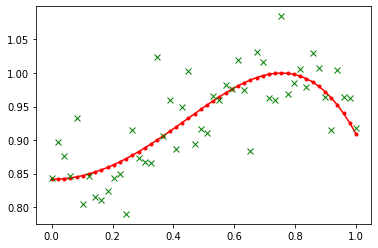

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')

4. Compute w based on full Bayesian Inference (by using basis functions like discussed in class).
5. Display the estimated values of w

In [4]:
def gaussian_basis(x, miu, sigma):
        return np.exp(-np.power(x-miu, 2) / (2*np.power(sigma, 2)))

In [7]:
def full_bayesian(x_act, y_noise, M, s, basis_function, alpha=1, beta=1):
    
    phi = np.matrix([[1] + [basis_function(x, n*s, s) for n in range(M-1)]
                     for x in x_act])
    
    s_n = linalg.inv(np.diag([alpha for x in range(M)]) + beta*phi.T*phi)
    
    m_n = s_n * beta * phi.T * np.matrix(y_noise).T
    
    y_pred = phi*m_n
    
    return m_n, y_est

In [8]:
w, y_est = full_bayesian(x_act, y_noise, 5, 0.2, gaussian_basis, 0.2, 1)

In [9]:
w

matrix([[ 0.92429025],
        [-0.02892154],
        [-0.04678706],
        [-0.03327963],
        [ 0.09254584]])

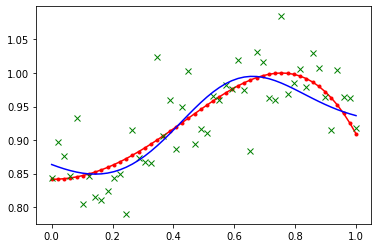

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_act, y_act, '-ro', markersize=3, label='Original curve')
ax.plot(x_act, y_noise, '-gx', linestyle='none', label='Noisy data')
ax.plot(x_act, y_est, 'b', label='Predicted curve')

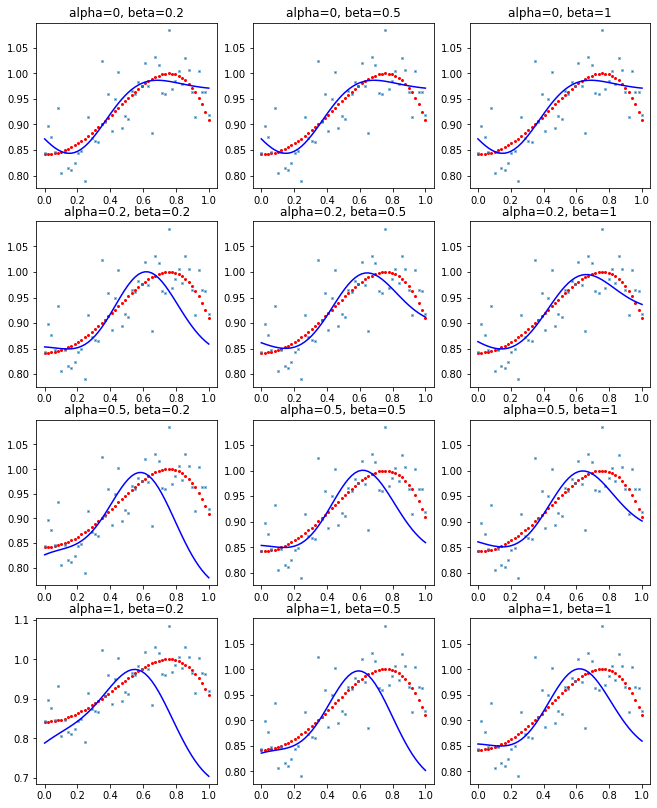

In [22]:
alpha_values = [0, 0.2, 0.5, 1]
beta_values = [0.2, 0.5, 1]
plot_num = 1

fig = plt.figure(figsize=[11, 14])
for alpha in alpha_values:
    for beta in beta_values:
        _, y_est = full_bayesian(x_act, y_noise, 5, 0.2, gaussian_basis, alpha, beta)
        
        ax = fig.add_subplot(4, 3, plot_num)
        plot_num += 1
        
        ax.plot(x_act, y_act, 'ro', markersize=2)   # Original curve
        ax.plot(x_act, y_noise, 'x', markersize=2)  # Noisy data
        ax.plot(x_act, y_est, 'b')                  # Fitted curve
        
        ax.set(title="alpha={}, beta={}".format(alpha, beta))
